# Exercise 1 - Linear and Logistic Regression with Error Estimation

## a) Linear regression

### Program 1 - Implementation of Linear Regression (From scratch and using Sklearn)

#### AIM:


To implement linear regression in python from scratch and using scikit learn

#### FORMULA:


Equation of the regression line, $y = b_0 + b_1 x$

$$
\newcommand{\vect}{\mathbf}
\begin{align}
b_1 &= \frac{\displaystyle \sum_{i=1}^{m}(x_i-\bar{x})(y_i-\bar{y})}{\displaystyle \sum_{i=1}^{m}(x_i-\bar{x})^2}
= \frac{(\vect{x}-\bar{x})^T(\vect{y}-\bar{y})}{(\vect{x}-\bar{x})^T(\vect{x}-\bar{x})}
\\
b_0 &= \bar{y}-b_1\bar{x} 
\\
\text{RMSE} &= \sqrt{\frac{1}{m}\sum_{i=1}^{m}(y_i-\hat{y_i})^2}
= \sqrt{\frac{(\vect{y}-\hat{\vect{y}})^T(\vect{y}-\hat{\vect{y}})}{m}} 
\\
\text{SS}_{\text{tot}} &= \sum_{i=1}^{m}(y_i - \bar{y})^2 = (\vect{y}-\bar{y})^T(\vect{y}-\bar{y})
\\
\text{SS}_{\text{res}} &= \sum_{i=1}^{m}(y_i - \hat{y}_i)^2 = (\vect{y}-\hat{\vect{y}})^T(\vect{y}-\hat{\vect{y}})
\\
R^{2} \text{score} &= 1-\frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
\end{align}
$$
where,  
$\vect{x} = (x_1,x_2,...,x_n)$ - input vector  
$\vect{y} = (y_1,y_2,...,y_n)$ - output vector  
$\bar{x}$ - mean of $\vect{x}$  
$\bar{y}$ - mean of $\vect{y}$  
$\hat{\vect{y}} = (\hat{y}_1,\hat{y}_2,...,\hat{y}_n)$ - Predicted output vector  

#### Part 1 - Importing modules and defining class for Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    def fit(self,X,y):
        m = X.shape[0]
        X_mean, y_mean = np.mean(X), np.mean(y)
        X_mean_diff, y_mean_diff = X-X_mean, y-y_mean
        self.b1 = (X_mean_diff @ y_mean_diff) / (X_mean_diff @ X_mean_diff)
        self.b0 = y_mean - (self.b1 * X_mean)
        print(f"(b0,b1):({self.b0:.3f},{self.b1:.3f})")
        return self
    
    def predict(self,X):
        return self.b0 + X*self.b1

    def evaluate(self,X,y):
        y_pred = self.predict(X)
        y_diff,y_mean_diff  = y-y_pred , y-np.mean(y)
        rmse = np.sqrt(y_diff @ y_diff/X.shape[0])
        ss_tot = y_mean_diff @ y_mean_diff
        ss_res = y_diff @ y_diff
        r2 = 1 - ss_res/ss_tot
        print("Root mean squared Error:",rmse)
        print("R^2 value:",r2)

#### Part 2 - Ploting function for regression

In [3]:
def regression_plot(X,y,model,title=""):
    plt.figure(figsize=(14,7))
    plt.title(title)
    plt.xlabel("Head Size(cm^3)")
    plt.ylabel("Brain Weights(grams)")
    
    x_line = np.array([np.min(X) - 100,np.max(X) + 100]).reshape(-1,1)
    y_line = model.predict(x_line)
    
    plt.scatter(X, y,c='orange', label='Original Data Points')
    plt.plot(x_line, y_line,linewidth=4, label='Regression Line')
    plt.legend()

#### Part 3 - Loading and processing the dataset

In [4]:
data = pd.read_csv('./datasets/headbrain.csv')
print("size:",data.size,"; shape",data.shape)
data.head()

size: 948 ; shape (237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


#### Part 4 - Implementing Linear Regression from scratch

In [5]:
X = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

(b0,b1):(325.573,0.263)
Root mean squared Error: 72.1206213783709
R^2 value: 0.639311719957


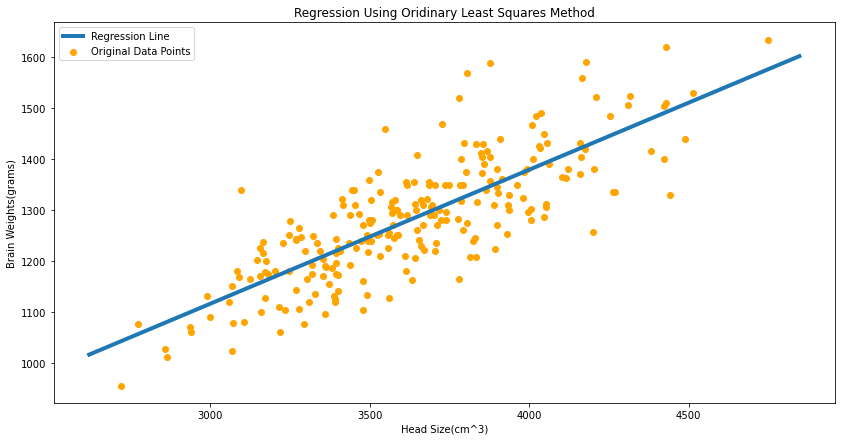

In [6]:
lin_reg_model= LinearRegression()
lin_reg_model.fit(X,y)
regression_plot(X,y,lin_reg_model,title="Regression Using Oridinary Least Squares Method")
lin_reg_model.evaluate(X,y)

#### Part 5 - Implementing Linear Regression using Scikit Learn

In [7]:
from sklearn.linear_model import LinearRegression as SkLinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
# sklearn requires 2d array for X values 
# thus we reshape X to X1 as follows
X1 = X.reshape(-1,1)

Root Mean Squared Error: 72.1206213783709
R^2 value: 0.639311719957


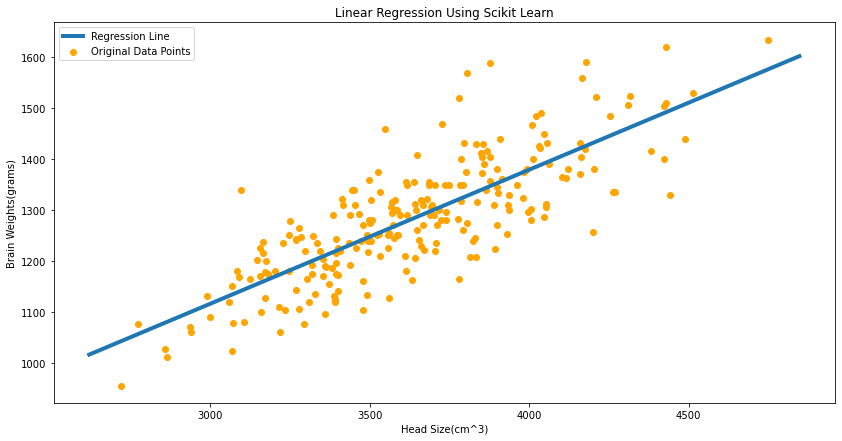

In [9]:
sk_lin_reg_model = SkLinearRegression().fit(X1, y)

regression_plot(X1,y,sk_lin_reg_model,title="Linear Regression Using Scikit Learn")

y_hat = sk_lin_reg_model.predict(X1)
rmse = np.sqrt(mean_squared_error(y, y_hat))
r2_score = sk_lin_reg_model.score(X1, y)
print("Root Mean Squared Error:",rmse)
print("R^2 value:",r2_score)

## b) Logistic Regression

### Program 1 - Preprocessing and implementing Logistic Regression on titanic dataset using Scikit Learn

#### AIM:
To preprocess and implement Logistic Regression in titanic dataset using Scikit Learn

#### Part 1 - Importing modules and Loading the dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv('./datasets/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Part 2 - Visualizing the dataset

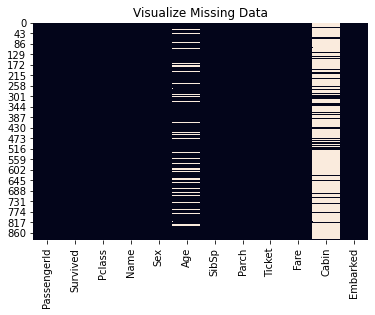

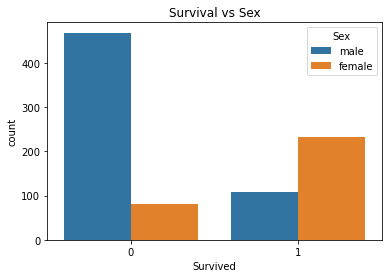

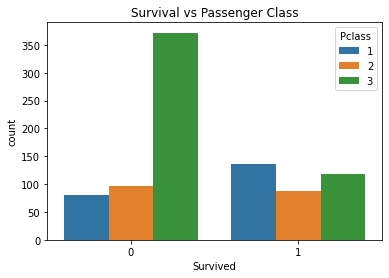

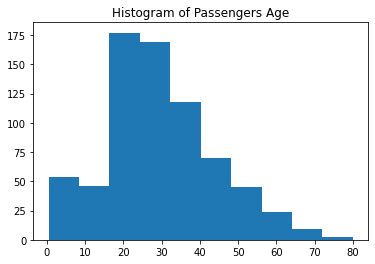

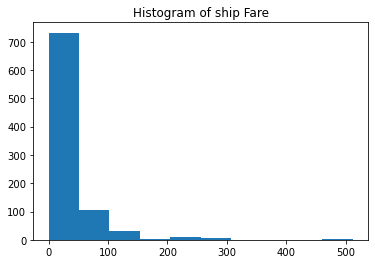

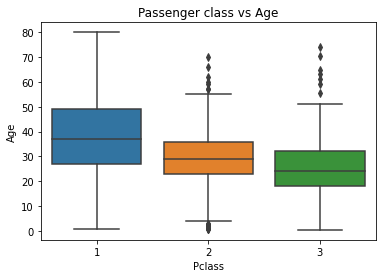

In [11]:
def plot(title,plot_func,*args,**kwargs):
    plt.title(title)
    plot_func(*args,**kwargs)
    plt.show()

plot('Visualize Missing Data',
   sns.heatmap,titanic_df.isnull(), cbar=False)
plot("Survival vs Sex",
    sns.countplot,x='Survived', hue='Sex', data=titanic_df)
plot("Survival vs Passenger Class",
    sns.countplot,x='Survived', hue='Pclass', data=titanic_df)
plot("Histogram of Passengers Age",
    plt.hist,titanic_df["Age"].dropna())
plot("Histogram of ship Fare",
    plt.hist,titanic_df['Fare'])
plot("Passenger class vs Age",
    sns.boxplot,x='Pclass', y='Age',data=titanic_df)

#### Part 3 - Dealing with missing, categorial and irrelevant  data

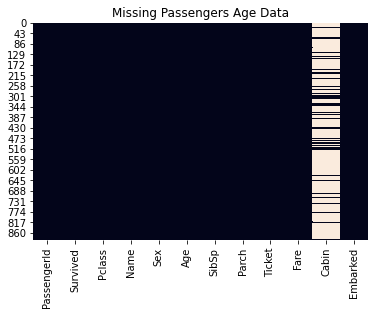

In [12]:
mean_ages = {
    p_class:titanic_df[titanic_df["Pclass"]==p_class]["Age"].mean()
    for p_class in titanic_df["Pclass"].unique()
}

def impute_missing_age(columns):
    age , p_class = columns
    if pd.isnull(age):
        return mean_ages[p_class]
    return age

titanic_df['Age'] = titanic_df[['Age', 'Pclass']].apply(
    impute_missing_age,axis = 1
)
plot("Missing Passengers Age Data",
    sns.heatmap,titanic_df.isnull(), cbar=False)

In [13]:
titanic_df.drop('Cabin', axis=1, inplace = True)
titanic_df.dropna(inplace = True)
sex_data = pd.get_dummies(titanic_df['Sex'], drop_first = True)
embarked_data = pd.get_dummies(titanic_df['Embarked'], drop_first = True)
titanic_df = pd.concat([titanic_df, sex_data, embarked_data], axis = 1)
titanic_df.drop(
    ['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'], 
    axis =1, inplace = True
)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#### Part 4 - Implementing Logistic Regression using Scikit Learn

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import minmax_scale

titanic_df[["Age","Fare"]] = minmax_scale(titanic_df[["Age","Fare"]])

X = titanic_df.drop('Survived', axis = 1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test =(
    train_test_split(X, y, test_size = 0.3)
)
model = LogisticRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

def print_title(title): print(f"{title:^50}\n{'='*50}")
    
print_title("Classification Report")
print(classification_report(y_test, y_hat))
print_title("Confusion Matrix")
print(confusion_matrix(y_test, y_hat))

              Classification Report               
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       178
           1       0.71      0.67      0.69        89

    accuracy                           0.80       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.80      0.80      0.80       267

                 Confusion Matrix                 
[[154  24]
 [ 29  60]]


### Program 2 - Logistic regression for diabetes prediction( From scrath vs using Scikit Learn) 

#### AIM:
To implement Logistic regression using Gradient descent from scratch and compare it with Logistic regression with Scikit Learn

#### FORMULA:

$$\text{Log-likelihood}, LL= \sum_{i=1}^{m}y_i log(p_i)+(1-y_i) log(1-p_i)$$ 
where, $$p_i = p( \vect{x}_i,\vect{w}) = \frac{1}{1+e^{-\vect{w}^T\vect{x}_i}}$$ 
$\vect{w} = (w_0,w_1,...,w_n)$ - weight vector  
$\vect{x}_i = (1, x_1, x_2,...,x_n)$ - $i$th input vector


To find $\vect{w}$ such that,$$\max_{\vect{w}}{LL} = \min_{\vect{w}}(-LL)$$
gradient of $-LL$, $$\frac{d(-LL)}{d\vect{w}} = \sum_{i=1}^{m}(p_i-y_i) \vect{x}_i$$
weight update step is given by,
$$\vect{w} := \vect{w} - \alpha \frac{d(-LL)}{d\vect{w}}
= \vect{w} - \alpha \sum_{i=1}^{m}(p_i-y_i)\vect{x}_i
=\vect{w} - \alpha (\vect{p}-\vect{y})^T X$$
where $\alpha$ - learning rate

#### Part 1 - Defining Class for Logistic Regression

In [15]:
import numpy as np
import pandas as pd

In [16]:

class LogitRegression() :
    def __init__( self, learning_rate, iterations) :
        self.learning_rate = learning_rate
        self.iterations = iterations

    def p(self,X):
        return 1/(1+np.exp(-(X @ self.w)))

    def fit(self, X, y) :
        m,n = X.shape
        X = np.hstack([np.ones((m,1)),X])
        y = y.squeeze()
        self.w = np.zeros(n+1)
        
        for i in range(self.iterations) :
            self.w = self.w - self.learning_rate * ((self.p(X)-y) @ X) 

    def predict(self, X) :
        m = X.shape[0]
        X = np.hstack([np.ones((m,1)),X])
        y_hat = np.where( self.p(X) > 0.5, 1, 0 )
        return y_hat

#### Part 2 - Loading and Processing Dataset

In [17]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:

diabetes_df = pd.read_csv( "./datasets/diabetes.csv" )
X = minmax_scale(diabetes_df.iloc[:,:-1].values)
y = diabetes_df.iloc[:,-1:].values.reshape(-1)
X_train, X_test, y_train, y_test =train_test_split(
    X, y, test_size = 1/3, random_state =6
)

#### Part 3 - Comparing Models

In [19]:

models = [
    LogitRegression(learning_rate = .1, iterations = 1000),
    LogisticRegression()
]
for model in models:
    model.fit(X_train,y_train)
    
def compute_accuracy(model,X_test,y_test):
    y_hat = model.predict(X_test)
    return (y_hat==y_test).mean() * 100 

print("Accuracy on test set by our implementation of Logistic Reg model :",
    compute_accuracy(models[0],X_test,y_test)
)
print("Accuracy on test set by sklearn model :",
    compute_accuracy(models[1],X_test,y_test) 
)

Accuracy on test set by our implementation of Logistic Reg model : 64.0625
Accuracy on test set by sklearn model : 78.515625
